# Predictive Analysis of Epilepsy based on features extracted from MRI images

The zscored freesurfer features measuring thickness, volume and surface of the brain areas are used to predict the epilepsy status of the patients.


In [115]:
#import libraries and modules
import pandas as pd
import numpy as np

In [116]:
def load_aparc_data(file_path):
    """
    Liest die Daten aus einer aparc Datei ein und bereitet sie auf.
    
    Args:
        file_path (str): Pfad zur aparc Datei
        
    Returns:
        pd.DataFrame: Aufbereiteter DataFrame mit den aparc Daten
    """
    df = pd.read_csv(file_path, delimiter='\s+', header=0).transpose()
    df.columns = df.iloc[0].values  # Erste Zeile als Spaltennamen verwenden
    df = df.drop(df.index[0])  # Erste Zeile entfernen, da sie jetzt die Spaltennamen sind
    return df

def clean_dataframe(df):
    """
    Bereinigt den DataFrame durch Entfernen bestimmter Spalten.
    
    Args:
        df: pandas DataFrame der bereinigt werden soll
        
    Returns:
        Bereinigter pandas DataFrame
    """
    columns_to_drop = [
        'ID',
        'rh.aparc.area',
        'lh.aparc.area', 
        'rh.aparc.volume',
        'lh.aparc.volume',
        'rh.aparc.thickness',
        'lh.aparc.thickness'
    ]
    
    # Entferne nur Spalten die tatsächlich existieren
    existing_columns = [col for col in columns_to_drop if col in df.columns]
    if existing_columns:
        df = df.drop(existing_columns, axis=1)
        
    return df

def remove_duplicate_columns(df):
    """
    Findet und entfernt Duplikatspalten aus einem DataFrame.
    
    Args:
        df: pandas DataFrame
        
    Returns:
        df_cleaned: DataFrame ohne Duplikatspalten
        duplicate_cols: Liste der entfernten Duplikatspalten
    """
    # Finde Duplikatspalten
    duplicate_columns = df.columns[df.columns.duplicated()]
    
    # Entferne Duplikatspalten
    df_cleaned = df.loc[:, ~df.columns.duplicated()]
    
    # Ausgabe der Ergebnisse
    print("\nGefundene und entfernte Duplikatspalten:")
    print("-" * 50)
    for col in duplicate_columns:
        print(f"- {col}")
        
    print("\nDimensionen nach Entfernung der Duplikate:")
    print("-" * 50)
    print(f"Vorher: {df.shape[0]} Zeilen x {df.shape[1]} Spalten")
    print(f"Nachher: {df_cleaned.shape[0]} Zeilen x {df_cleaned.shape[1]} Spalten")
    print("-" * 50)
    
    return df_cleaned, list(duplicate_columns)

In [117]:
# Lade Flächen-Daten
df_pat_aparc_area = load_aparc_data('../dataset/freesurfer_thvosu_DKparcellation/aparc_area.txt')
df_cont_aparc_area = load_aparc_data('../dataset/freesurfer_thvosu_DKparcellation/controls_aparc_area.txt')

# Lade Volumen-Daten 
df_pat_aparc_volume = load_aparc_data('../dataset/freesurfer_thvosu_DKparcellation/aparc_vol.txt')
df_cont_aparc_volume = load_aparc_data('../dataset/freesurfer_thvosu_DKparcellation/controls_aparc_vol.txt')

# Lade Dicke-Daten
df_pat_aparc_thickness = load_aparc_data('../dataset/freesurfer_thvosu_DKparcellation/aparc_thick.txt')
df_cont_aparc_thickness = load_aparc_data('../dataset/freesurfer_thvosu_DKparcellation/controls_aparc_thick.txt')

# Dimensionen der Dataframes ausgeben
print("\nDimensionen der Dataframes:")
print("-" * 50)
print(f"Patienten Flächen (area):     {df_pat_aparc_area.shape[0]} Zeilen x {df_pat_aparc_area.shape[1]} Spalten")
print(f"Kontrollen Flächen (area):    {df_cont_aparc_area.shape[0]} Zeilen x {df_cont_aparc_area.shape[1]} Spalten")
print("-" * 50)
print(f"Patienten Volumen (volume):   {df_pat_aparc_volume.shape[0]} Zeilen x {df_pat_aparc_volume.shape[1]} Spalten") 
print(f"Kontrollen Volumen (volume):  {df_cont_aparc_volume.shape[0]} Zeilen x {df_cont_aparc_volume.shape[1]} Spalten")
print("-" * 50)
print(f"Patienten Dicke (thickness):  {df_pat_aparc_thickness.shape[0]} Zeilen x {df_pat_aparc_thickness.shape[1]} Spalten")
print(f"Kontrollen Dicke (thickness): {df_cont_aparc_thickness.shape[0]} Zeilen x {df_cont_aparc_thickness.shape[1]} Spalten")
print("-" * 50)



Dimensionen der Dataframes:
--------------------------------------------------
Patienten Flächen (area):     442 Zeilen x 75 Spalten
Kontrollen Flächen (area):    100 Zeilen x 75 Spalten
--------------------------------------------------
Patienten Volumen (volume):   442 Zeilen x 73 Spalten
Kontrollen Volumen (volume):  100 Zeilen x 73 Spalten
--------------------------------------------------
Patienten Dicke (thickness):  442 Zeilen x 75 Spalten
Kontrollen Dicke (thickness): 100 Zeilen x 75 Spalten
--------------------------------------------------


In [118]:
# Kombiniere alle Patienten-Daten basierend auf den ID-Spalten
df_patients = pd.merge(df_pat_aparc_area, df_pat_aparc_volume, 
                     left_on='lh.aparc.area', right_on='lh.aparc.volume')
df_patients = pd.merge(df_patients, df_pat_aparc_thickness,
                     left_on='lh.aparc.area', right_on='lh.aparc.thickness')


# Kombiniere alle Kontroll-Daten basierend auf den ID-Spalten
df_control = pd.merge(df_cont_aparc_area, df_cont_aparc_volume,
                    left_on='lh.aparc.area', right_on='lh.aparc.volume')
df_control = pd.merge(df_control, df_cont_aparc_thickness,
                    left_on='lh.aparc.area', right_on='lh.aparc.thickness')

# Dimensionen der kombinierten Dataframes ausgeben
print("\nDimensionen der kombinierten Dataframes:")
print("-" * 50)
print(f"Patienten (kombiniert):     {df_patients.shape[0]} Zeilen x {df_patients.shape[1]} Spalten")
print(f"Kontrollen (kombiniert):    {df_control.shape[0]} Zeilen x {df_control.shape[1]} Spalten")
print("-" * 50)



Dimensionen der kombinierten Dataframes:
--------------------------------------------------
Patienten (kombiniert):     442 Zeilen x 223 Spalten
Kontrollen (kombiniert):    100 Zeilen x 223 Spalten
--------------------------------------------------


In [113]:
df_dummies = pd.concat([df_patients, df_control], ignore_index=True).copy(deep=True)
df_dummies['patient'] = df_dummies['lh.aparc.area']
# Ausgabe der neuen Spalte 'patient'
print("\nInhalt der Spalte 'patient':")
print("-" * 50)
print(df_dummies['patient'])
print("-" * 50)


# Erstelle einen neuen Ordner, falls er nicht existiert
import os
if not os.path.exists('dummy_samples'):
    os.makedirs('dummy_samples')


df_dummies = clean_dataframe(df_dummies)

# Dimensionen des Dataframes ausgeben
print("\nDimensionen des Dataframes:")
print("-" * 50)
print(f"Dataframe df_dummies: {df_dummies.shape[0]} Zeilen x {df_dummies.shape[1]} Spalten")
print("-" * 50)


# Funktion aufrufen
df_dummies, removed_columns = remove_duplicate_columns(df_dummies)


import re
import os
import glob

# Lösche alle vorhandenen CSV-Dateien im dummy_samples Ordner
files = glob.glob('dummy_samples/*.csv')
for f in files:
    os.remove(f)

# Speichere für jede Zeile eine separate CSV-Datei
for idx, row in df_dummies.iterrows():
    # Hole den Wert aus der Spalte "patient" für den Dateinamen
    raw_filename = str(df_dummies.loc[idx, 'patient'])
    clean_filename = re.sub(r'\W+', '_', raw_filename)  # Ersetze ungültige Zeichen durch "_"
    
    # Stelle sicher, dass der Dateiname nicht zu lang wird (max. 255 Zeichen für Windows)
    clean_filename = clean_filename[:100]  # Kürzen auf 100 Zeichen für Sicherheit
    
    filename = os.path.join('dummy_samples', f"{clean_filename}.csv")
    
    # Entferne die Spalte "patient" bevor der CSV erstellt wird
    row_without_patient = row.drop('patient')
    row_without_patient.to_frame().T.to_csv(filename, index=False)

print(f"CSV-Dateien wurden im Ordner 'dummy_samples' gespeichert.")


Inhalt der Spalte 'patient':
--------------------------------------------------
0         1.0
1         2.0
2         3.0
3         4.0
4         5.0
        ...  
537    4096.0
538    4097.0
539    4098.0
540    4099.0
541    4100.0
Name: patient, Length: 542, dtype: object
--------------------------------------------------

Dimensionen des Dataframes:
--------------------------------------------------
Dataframe df_dummies: 542 Zeilen x 221 Spalten
--------------------------------------------------

Gefundene und entfernte Duplikatspalten:
--------------------------------------------------
- BrainSegVolNotVent_x
- eTIV_x
- BrainSegVolNotVent_y
- eTIV_y
- BrainSegVolNotVent
- eTIV

Dimensionen nach Entfernung der Duplikate:
--------------------------------------------------
Vorher: 542 Zeilen x 221 Spalten
Nachher: 542 Zeilen x 215 Spalten
--------------------------------------------------
CSV-Dateien wurden im Ordner 'dummy_samples' gespeichert.



Verhältnis Patienten/Kontrollen: 1.00

Nach Balancierung:
Anzahl Patienten: 442
Anzahl Kontrollen: 442

Gefundene und entfernte Duplikatspalten:
--------------------------------------------------
- BrainSegVolNotVent_x
- eTIV_x
- BrainSegVolNotVent_y
- eTIV_y
- BrainSegVolNotVent
- eTIV

Dimensionen nach Entfernung der Duplikate:
--------------------------------------------------
Vorher: 884 Zeilen x 221 Spalten
Nachher: 884 Zeilen x 215 Spalten
--------------------------------------------------
Index(['rh_bankssts_area', 'rh_caudalanteriorcingulate_area',
       'rh_caudalmiddlefrontal_area', 'rh_cuneus_area', 'rh_entorhinal_area',
       'rh_fusiform_area', 'rh_inferiorparietal_area',
       'rh_inferiortemporal_area', 'rh_isthmuscingulate_area',
       'rh_lateraloccipital_area',
       ...
       'lh_rostralmiddlefrontal_thickness', 'lh_superiorfrontal_thickness',
       'lh_superiorparietal_thickness', 'lh_superiortemporal_thickness',
       'lh_supramarginal_thickness', 'lh_fron

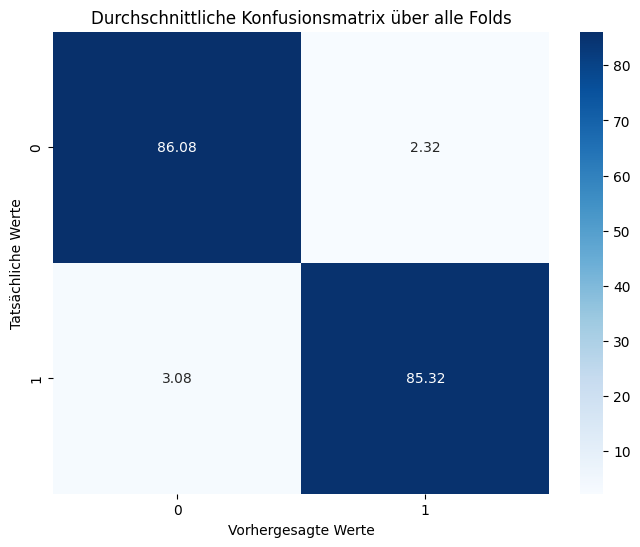

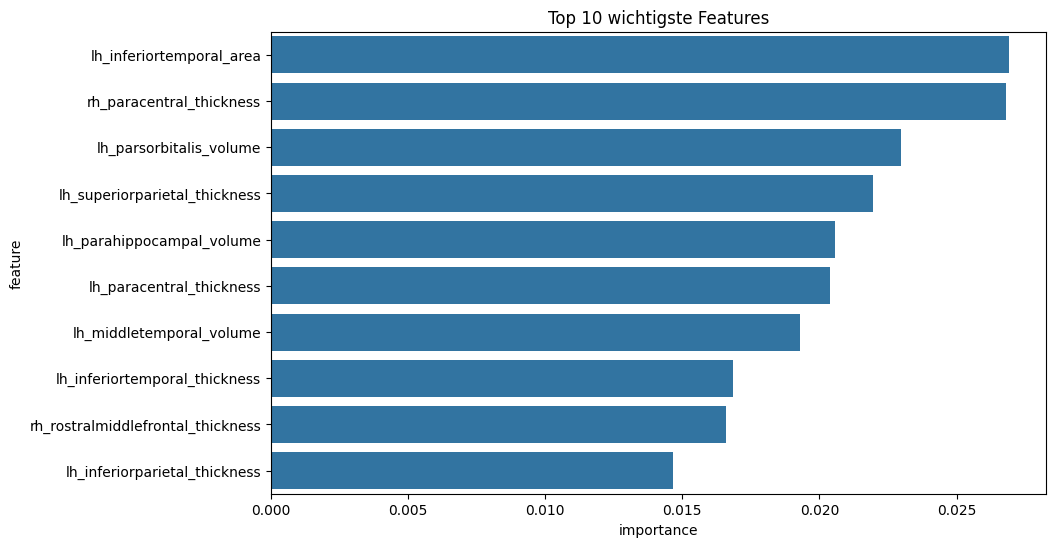

In [120]:
# Berechne das Verhältnis
ratio = len(df_patients) / len(df_control)
print(f"\nVerhältnis Patienten/Kontrollen: {ratio:.2f}")

# Verwende Random Over-Sampling für die Kontrollgruppe
from sklearn.utils import resample

# Over-sampling der Minderheitsklasse (Kontrollen)
df_control_upsampled = resample(df_control,
                               replace=True,
                               n_samples=len(df_patients),
                               random_state=None)

# Überprüfe die neuen Größen
print("\nNach Balancierung:")
print("Anzahl Patienten:", len(df_patients))
print("Anzahl Kontrollen:", len(df_control_upsampled))

# Ersetze das ursprüngliche df_control mit der balancierten Version
df_control = df_control_upsampled


# Füge die Diagnose-Spalte zu beiden DataFrames hinzu
df_patients['diagnosis'] = 'epilepsy'
df_control['diagnosis'] = 'healthy'

# Kombiniere die beiden DataFrames
df_combined = pd.concat([df_patients, df_control], ignore_index = True)


# Bereinige den DataFrame
df_combined = clean_dataframe(df_combined)

df_combined, removed_columns = remove_duplicate_columns(df_combined)

    
# Trenne Features und Labels
X = df_combined.drop('diagnosis', axis=1)
y = df_combined['diagnosis']

print(X.columns)

# Gebe die Anzahl der Features aus
print(f"Anzahl der verwendeten Features: {X.shape[1]}")

# Importiere notwendige ML-Bibliotheken
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialisiere RepeatedStratifiedKFold
n_splits = 5
n_repeats = 10
rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

# Initialisiere Listen für die Metriken
y_true_all = []
y_pred_all = []

# Initialisiere Confusion Matrix
cm_total = np.zeros((2, 2))

# Durchführe repeated k-fold Cross-Validation
for fold, (train_index, test_index) in enumerate(rskf.split(X, y), 1):
    # Splitte Daten
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Standardisiere Features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Trainiere Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    
    # Mache Vorhersagen
    y_pred = rf_model.predict(X_test_scaled)
    
    # Sammle alle Vorhersagen und wahren Werte
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)
    
    # Aktualisiere Confusion Matrix
    cm_fold = confusion_matrix(y_test, y_pred)
    cm_total += cm_fold

# Zeige gemittelte Metriken am Ende
print("\nGemittelte Metriken über alle Folds:")
print(classification_report(y_true_all, y_pred_all))

# Zeige durchschnittliche Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_total/(n_splits*n_repeats), annot=True, fmt='.2f', cmap='Blues')
plt.title('Durchschnittliche Konfusionsmatrix über alle Folds')
plt.ylabel('Tatsächliche Werte')
plt.xlabel('Vorhergesagte Werte')
plt.show()

# Trainiere finales Modell auf allen Daten für Feature Importance
scaler_final = StandardScaler()
X_scaled_final = scaler_final.fit_transform(X)
rf_model_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_final.fit(X_scaled_final, y)

# Zeige Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model_final.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 wichtigste Features')
plt.show()





In [121]:
# Speichere das finale Modell
import joblib

# Speichere das Modell und den Scaler
joblib.dump(rf_model_final, 'rf_model_final.joblib')
joblib.dump(scaler_final, 'scaler_final.joblib')

"""
Beispiel für den Aufruf des gespeicherten Modells:

# Laden des Modells und Scalers
loaded_model = joblib.load('rf_model_final.joblib')
loaded_scaler = joblib.load('scaler_final.joblib')

# Vorhersage für neue Daten
X_new = ...  # Neue Daten
X_new_scaled = loaded_scaler.transform(X_new)
predictions = loaded_model.predict(X_new_scaled)
"""





"\nBeispiel für den Aufruf des gespeicherten Modells:\n\n# Laden des Modells und Scalers\nloaded_model = joblib.load('rf_model_final.joblib')\nloaded_scaler = joblib.load('scaler_final.joblib')\n\n# Vorhersage für neue Daten\nX_new = ...  # Neue Daten\nX_new_scaled = loaded_scaler.transform(X_new)\npredictions = loaded_model.predict(X_new_scaled)\n"


=== KNN ===

Klassifikationsbericht:
              precision    recall  f1-score   support

    epilepsy       0.99      0.91      0.95        88
     healthy       0.92      0.99      0.95        88

    accuracy                           0.95       176
   macro avg       0.95      0.95      0.95       176
weighted avg       0.95      0.95      0.95       176



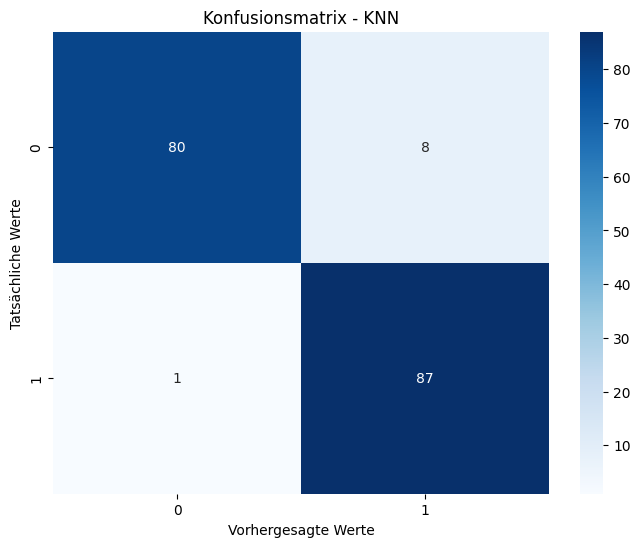


=== Gaussian NB ===

Klassifikationsbericht:
              precision    recall  f1-score   support

    epilepsy       0.67      0.58      0.62        88
     healthy       0.63      0.72      0.67        88

    accuracy                           0.65       176
   macro avg       0.65      0.65      0.65       176
weighted avg       0.65      0.65      0.65       176



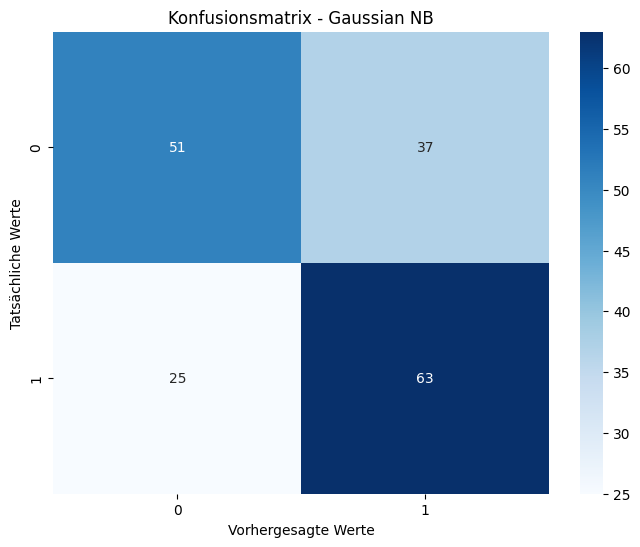


=== SVC ===

Klassifikationsbericht:
              precision    recall  f1-score   support

    epilepsy       0.91      0.90      0.90        88
     healthy       0.90      0.91      0.90        88

    accuracy                           0.90       176
   macro avg       0.90      0.90      0.90       176
weighted avg       0.90      0.90      0.90       176



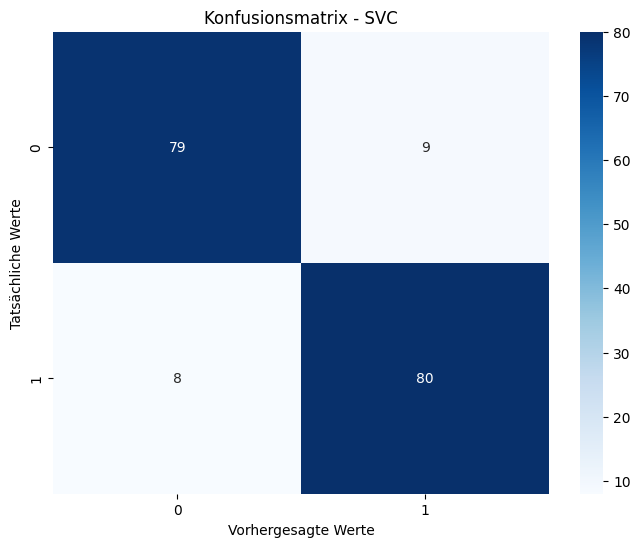


=== Logistische Regression ===

Klassifikationsbericht:
              precision    recall  f1-score   support

    epilepsy       0.99      0.84      0.91        88
     healthy       0.86      0.99      0.92        88

    accuracy                           0.91       176
   macro avg       0.92      0.91      0.91       176
weighted avg       0.92      0.91      0.91       176



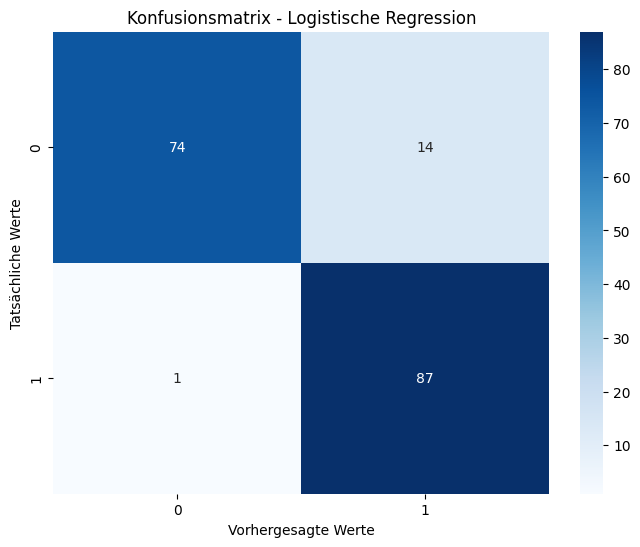

<Figure size 1200x600 with 0 Axes>

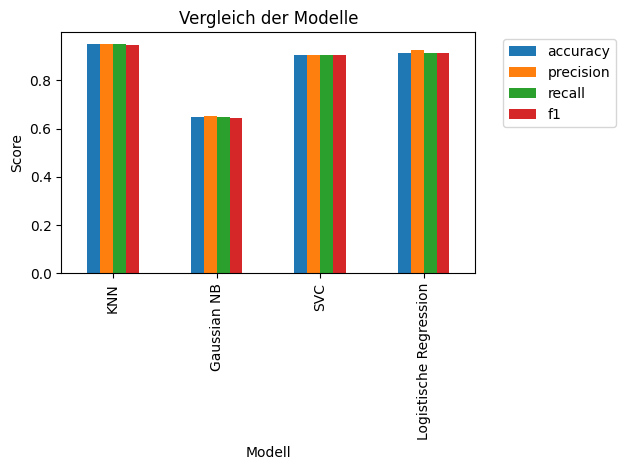

In [53]:
# Importiere zusätzliche Modelle und Metriken
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dictionary für alle Modelle
models = {
    'KNN': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    'Gaussian NB': GaussianNB(),
    'SVC': SVC(kernel='rbf', random_state=42),
    'Logistische Regression': LogisticRegression(random_state=42)
}

# Ergebnisse speichern
results = {}

# Trainiere und evaluiere jedes Modell
for name, model in models.items():
    print(f"\n=== {name} ===")
    
    # Trainiere Modell
    model.fit(X_train_scaled, y_train)
    
    # Mache Vorhersagen
    y_pred = model.predict(X_test_scaled)
    
    # Speichere Metriken
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }
    
    # Zeige Klassifikationsbericht
    print("\nKlassifikationsbericht:")
    print(classification_report(y_test, y_pred))
    
    # Erstelle Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Konfusionsmatrix - {name}')
    plt.ylabel('Tatsächliche Werte')
    plt.xlabel('Vorhergesagte Werte')
    plt.show()

# Vergleiche alle Modelle
results_df = pd.DataFrame(results).T
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar')
plt.title('Vergleich der Modelle')
plt.xlabel('Modell')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




Epoch 1/50


c:\Users\rickert\Documents\team_10\.venv2\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5912 - loss: 0.6700 - val_accuracy: 0.4507 - val_loss: 0.8057
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7737 - loss: 0.4989 - val_accuracy: 0.6268 - val_loss: 0.6322
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8178 - loss: 0.3778 - val_accuracy: 0.7887 - val_loss: 0.4397
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9130 - loss: 0.2782 - val_accuracy: 0.7958 - val_loss: 0.4424
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8909 - loss: 0.2707 - val_accuracy: 0.8662 - val_loss: 0.3448
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9410 - loss: 0.2023 - val_accuracy: 0.8310 - val_loss: 0.3505
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9415 - loss: 0.1336 - val_accuracy: 0.8662 - val_loss: 0.1927
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9415 - loss: 0.1302 - val_accuracy: 0.8662 - val_loss: 0.2874
Ep

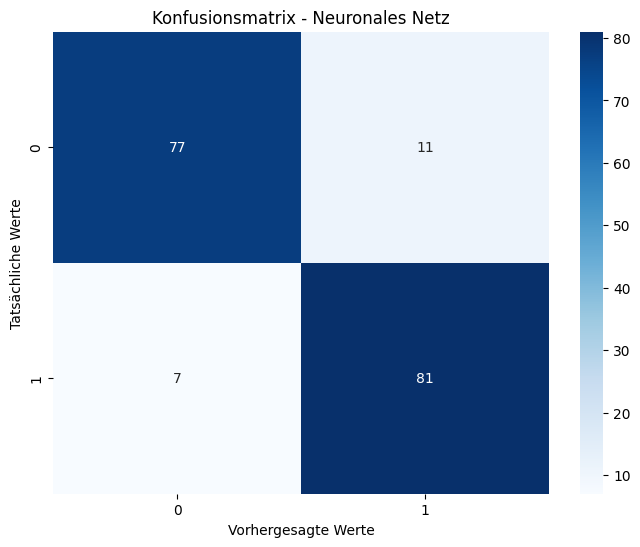

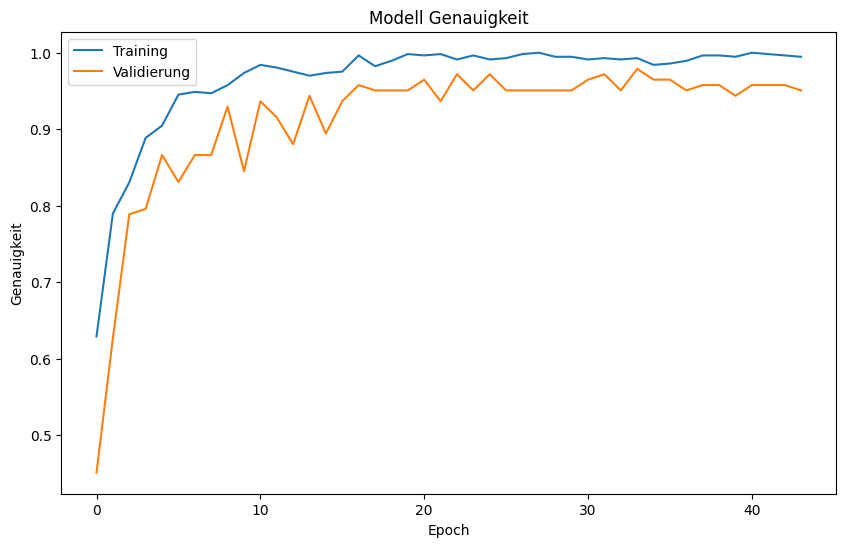

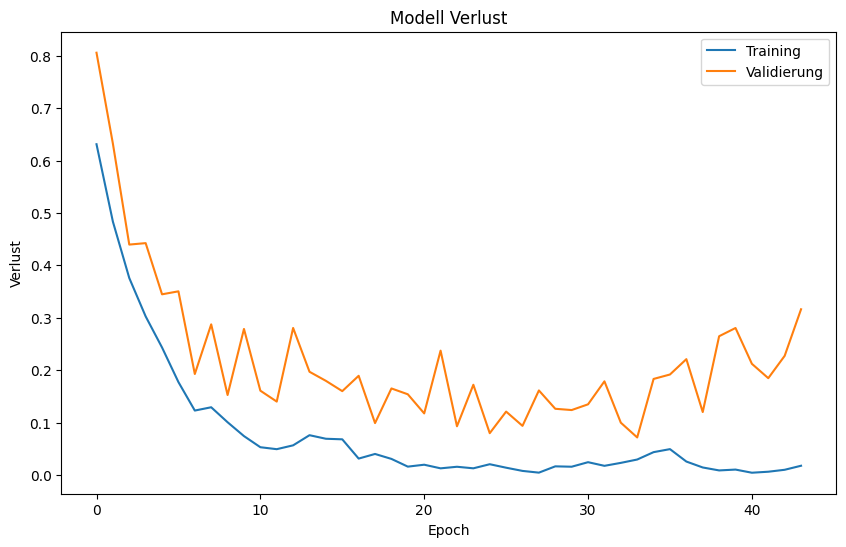

In [56]:
# Neuronales Netz mit Keras/TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping

# LabelEncoder für Zielwerte (y_train und y_test)
le = LabelEncoder()
y_train_int = le.fit_transform(y_train)
y_test_int = le.transform(y_test)

# One-Hot-Encoding für die Zielwerte
y_train_cat = to_categorical(y_train_int)
y_test_cat = to_categorical(y_test_int)

# Neuronales Netz erstellen
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(y_train_cat.shape[1], activation='sigmoid')
])

# Modell kompilieren
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early Stopping definieren, um Overfitting zu vermeiden
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=10,  # Wie viele Epochen ohne Verbesserung erlaubt sind
                               restore_best_weights=True)

# Modell trainieren
history = model.fit(X_train_scaled, y_train_cat,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stopping])  # EarlyStopping einfügen

# Vorhersagen machen
y_pred_prob = model.predict(X_test_scaled)
y_pred_nn = le.inverse_transform(np.argmax(y_pred_prob, axis=1))

# Metriken berechnen
print("\n=== Neuronales Netz ===")
print("\nKlassifikationsbericht:")
print(classification_report(y_test, y_pred_nn))

# Konfusionsmatrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Konfusionsmatrix - Neuronales Netz')
plt.ylabel('Tatsächliche Werte')
plt.xlabel('Vorhergesagte Werte')
plt.show()

# Trainings- und Validierungsverlauf
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validierung')
plt.title('Modell Genauigkeit')
plt.xlabel('Epoch')
plt.ylabel('Genauigkeit')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validierung')
plt.title('Modell Verlust')
plt.xlabel('Epoch')
plt.ylabel('Verlust')
plt.legend()
plt.show()
